### Exercise 09

PROBLEMA DEL COMMESSO VIAGGIATORE

Il problema del commesso viaggiatore consiste in un commesso e un set di $N$ città con posizioni $\vec{c}_i$. Il commesso deve visitare ognuna delle città, iniziando da una certa e ritornando alla città di partenza. 
**La sfida è che il commesso vuole minimizzare la lunghezza totale del viaggio.**

Per risolvere un problema di questo tipo ho utilizzato l'algoritmo genetico.

Descrivo come ho implemetato l'algoritmo.

1. Ho generato una sequenza ordinata di città di posizioni $\vec c_1,\dots, \vec c_N$ che costituiscono la mappa delle città che il commesso deve visitare. Per far questo ho implementato una classe $\textbf{Maps}$ il cui costruttore genera un vettore di strutture $\textbf{Pos}$ i cui data membri rappresentano la posizione $(x,y)$ di ogni città. La classe contiene anche un metodo per il calcolo delle distanze tra due città della mappa, chiamato $\textit{Dist}$, che vuole come argomento gli indici delle città in considerazione e restituisce un double.

  
2. Una volta costruita la mappa delle città ho generato la popolazione degli individui, che in questo caso sono dei percorsi. Una popolazione è un vettore di oggetti di tipo $\textbf{Chrom}$. A sua volta la classe $\textbf{Chrom}$ permette di creare degli oggetti costituiti da un $\textit{vec}$ di interi di dimensione $N$ riempito con una permutazione di numeri compresi tra $[0,N)$. L'idea è che ogni elemento del vettore della classe $\textbf{Chrom}$ è  l'indice di una città e perciò un oggetto Chrom coincide proprio con un percorso. La classe $\textbf{Chrom}$ presenta un metodo che riceve in input un oggetto di tipo $\textbf{Maps}$ e che permette di calcolare la loss function, ovvero la lunghezza del percorso intero  $$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$ quest'ulitma è la quantità da minimizzare per risolvere il problema.

    
3. Una volta generata la popolazione di percorsi ho eseguito la selezione di individui (per il crossover) la cui scelta si deve basare sui valori di fitness. Per fare questo ho utilizzato il metodo della "rigged roulette". Una volta calcolata la loss function legata ad ogni percorso, ho ordinato il vettore popolazione in ordine crescente di $L^{(2)}$ e quindi in ordine decrescente di fitness. Ogni volta che l'algortimo deve selezionare un certo individuo per l'operazione di Crossover viene estratto un indice: $$r=|\{rand[0,1)\}^p\cdot N|$$  con  $p\geq 1$, ($p=2$).

Questo metodo mappa una certa distribuzione piatta di interi tra $[0,N]$ in una distribuzione per cui si ha maggiore probabilità di selezionare un indice piccolo, permettendo di selezionare con maggiore probabilità gli individui con loss function minore.


4. Selezionati gli individui ho effettuato il Crossover e generato due figli mescolando il patrimonio genetico del padre e della madre. Ho implementato il crossover utilizzando un costruttore della classe $\textbf{Chrom}$ che ha come argomento due oggetti di tipo $\textit{Chrom}$ e un indice estratto casualmente tra $(0,N)$ che indica l'indice a cui tagliare i vettori sia del padre che della madre. A questo punto viene creato l'individuo figlio secondo la regola del Crossover. Effettuo tale operazione con una probabilità $P_c=0.95$.

5. Una volta generata la nuova popolazione ho effettuato le mutazioni su tutti gli individui. In particolare ho implementato la scambio di due elementi, lo shiht di $n$ posizioni per ogni elemento, lo shift di $n$ di $m$ città contigue e infine l'inversione dell'ordine in cui appaiono $m$ città con $(m\leq N$, $P_m=0.1)$. Infine ho sfruttato l'elitarietà in cui veniva sostituito il peggiore individuo della nuova popolazione e sostituito con il miglior individuo della popolazione precedente ($P_e=0.05$).

6. Ho itarato tale procedimento per un numero di volte pari a *Ngeneration = 500*.

7. Ho implementato una funzione Check che sia quando viene generata la popolazione, sia ogni qual volta avviene il crossover seguito delle mutazioni verifica che i percorsi della popolazione mantengano i requisiti richiesti. Ovvero che la prima città per tutti i percorsi sia sempre la numero 1 e che all'interno di un percorso una città non posso essere ripetuta. Nel caso una di queste due condizioni non si verificasse l'esecuzione del programma viene interrotta.

Ho effettuato la simulazione considerando $32$ città, una popolazione di $N_p=50$ percorsi e un numero di generazioni $N_g=500$.
Riporto i grafici di $L^{(2)}$ del miglior percorso e di $\langle L^{(2)}\rangle$, media sulla prima metà dei percorsi della popolazione, entrambi in funzione del numero di generazioni.

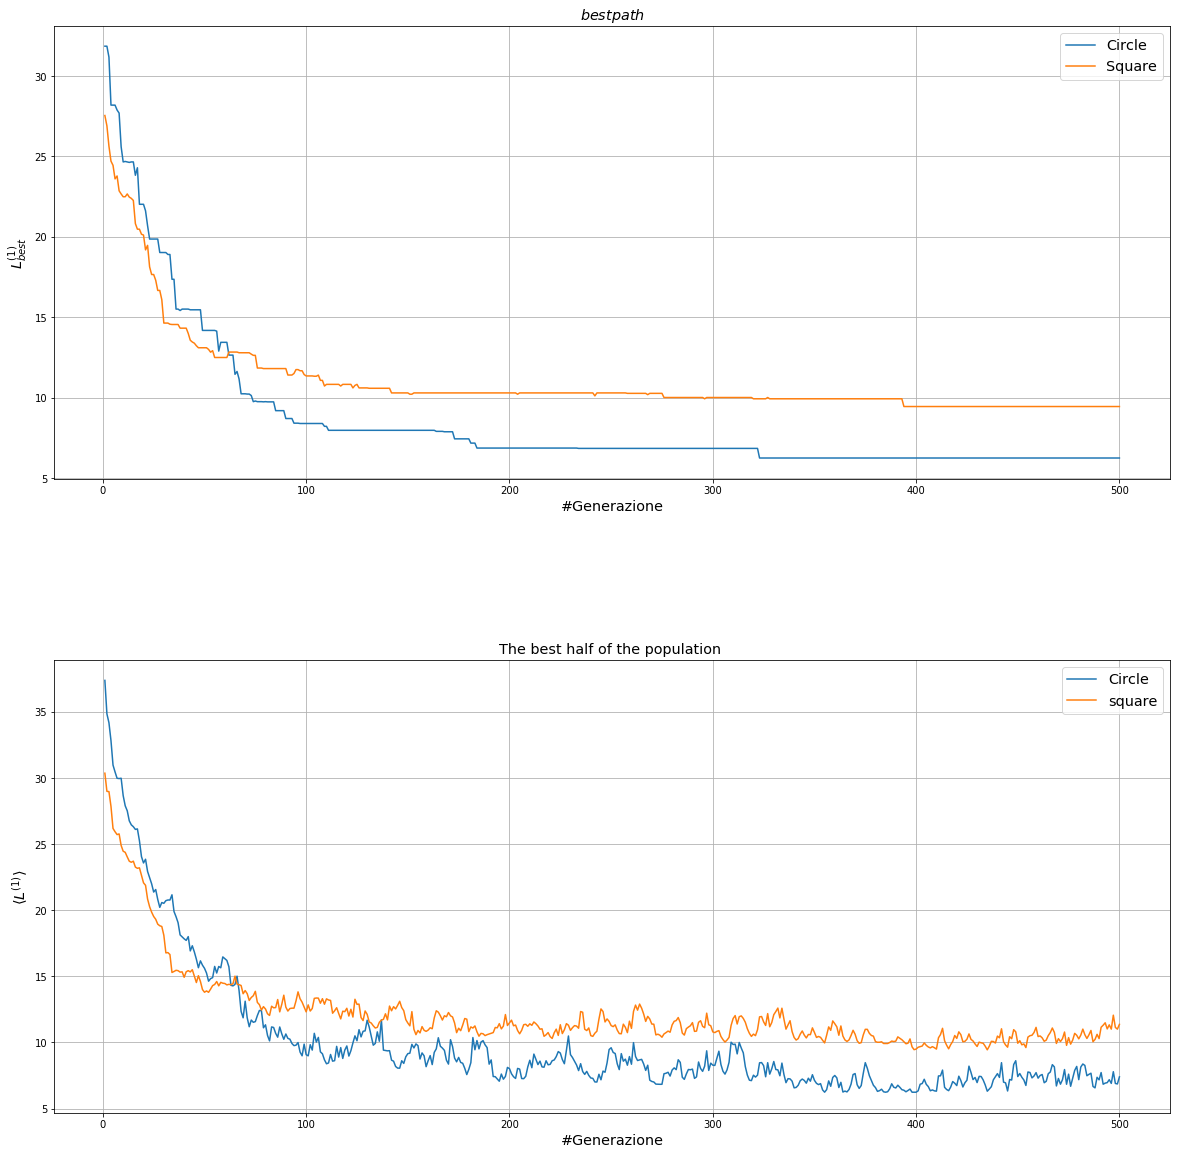

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math
import matplotlib.gridspec as gridspec

N_gen_c, I_best_c, = np.loadtxt("./Genetic_algorithm/Best_circ.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_gen_r, I_best_r, = np.loadtxt("./Genetic_algorithm/Best_quad.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_gen_half_c, I_best_half_c= np.loadtxt("./Genetic_algorithm/Half_circ.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_gen_half_r, I_best_half_r= np.loadtxt("./Genetic_algorithm/Half_quad.dat", usecols=(0,1), delimiter='\t', unpack='true')

G = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(20,20))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(N_gen_c,I_best_c,label="Circle")
fig_1.plot(N_gen_r,I_best_r,label="Square")
fig_1.set_title(r'$ best path$',fontsize='x-large')
fig_1.set_xlabel('#Generazione',fontsize='x-large')
fig_1.set_ylabel(r'$L^{(1)}_{best}$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[1, 0])
fig_2.plot(N_gen_half_c,I_best_half_c,label="Circle")
fig_2.plot(N_gen_half_r,I_best_half_r,label="square")
fig_2.set_title('The best half of the population ',fontsize='x-large')
fig_2.set_xlabel('#Generazione',fontsize='x-large')
fig_2.set_ylabel(r'$\langle L^{(1)}\rangle$',fontsize='x-large')
fig_2.legend(fontsize='x-large')
fig_2.grid(True)

plt.show()

Noto che all'aumentare del numero di generazioni la lunghezza del percorso del miglior individuo della popolazione tende molto rapidamente al valore minimo, così come succede per la media sulla prima metà della popolazione, il cui valor medio oscilla.
Nei grafici "best" ottengo che il valore minimo del percorso per circonferenza e quadrato è:

Best_circ = 6.24

Best_quad = 9.44

Riporto ora i due path corrispondeneti a queste due lunghezze:

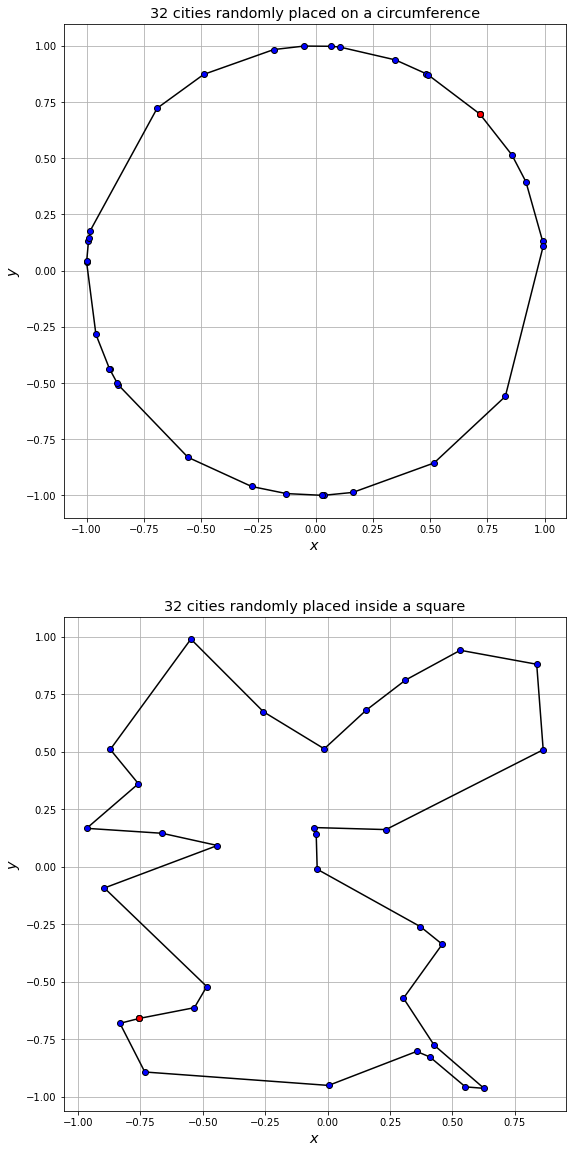

In [3]:
i_c, x_c, y_c= np.loadtxt("./Genetic_algorithm/Maps_circ", usecols=(0,1,2), delimiter='\t', unpack='true')
i_s, x_s, y_s= np.loadtxt("./Genetic_algorithm/Maps_quad", usecols=(0,1,2), delimiter='\t', unpack='true')

G = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(9,20))
f.subplots_adjust(hspace=0.2, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(x_c, y_c, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_1.plot(x_c[0],y_c[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_1.set_title(r'32 cities randomly placed on a circumference',fontsize='x-large')
fig_1.set_xlabel('$x$',fontsize='x-large')
fig_1.set_ylabel(r'$y$',fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[1, 0])
fig_2.plot(x_s, y_s, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_2.plot(x_s[0],y_s[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_2.set_title(r'32 cities randomly placed inside a square',fontsize='x-large')
fig_2.set_xlabel('$x$',fontsize='x-large')
fig_2.set_ylabel(r'$y$',fontsize='x-large')

fig_2.grid(True)


plt.show()

In questo esercizio ho notato come la probabilità con cui può avvenire il crossover è un parametro molto importante per la ricerca del minimo del percorso, in particolare nel caso in cui le città siano disposta all'interno di un quadrato.
Impostando $P_c=0.95$ ottengo il percorso più breve in assoluto. Con probabilità minore la lunghezza aumenta di qualche decimo, fino a raggiungere valori > 10.5, a fronte del valore migliore in assoluto, appunto ottenuto con $P_c<0.95$, che è di 9.44.